### Initial Explorations of BTC Kaggle 

In [4]:
import pandas as pd

# Update filename if different
file_path = "/Users/halladaykinsey/Desktop/btcusd_1-min_data.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6779281 entries, 0 to 6779280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 310.3 MB
None
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0


In [6]:
df['tTimestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Convert UNIX timestamp
df.set_index('Timestamp', inplace=True)  # Set as index

print(df.head())

              Open  High   Low  Close  Volume          tTimestamp
Timestamp                                                        
1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:01:00
1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:02:00
1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:03:00
1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:04:00
1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:05:00


In [7]:
import numpy as np

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

Open          0
High          0
Low           0
Close         0
Volume        0
tTimestamp    1
dtype: int64


### Basic Statistical Summary

Let’s get an overview of price trends.

In [8]:
# Summary statistics
print(df.describe())

               Open          High           Low         Close        Volume  \
count  6.779280e+06  6.779280e+06  6.779280e+06  6.779280e+06  6.779280e+06   
mean   1.507123e+04  1.507766e+04  1.506460e+04  1.507124e+04  5.439022e+00   
min    3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00  0.000000e+00   
25%    4.150200e+02  4.151500e+02  4.149700e+02  4.150100e+02  1.846336e-02   
50%    6.325545e+03  6.327640e+03  6.323090e+03  6.325565e+03  4.972122e-01   
75%    2.370002e+04  2.371100e+04  2.369000e+04  2.370021e+04  3.157067e+00   
max    1.089460e+05  1.090300e+05  1.087760e+05  1.089600e+05  5.853852e+03   
std    2.068587e+04  2.069363e+04  2.067793e+04  2.068590e+04  2.287430e+01   

                          tTimestamp  
count                        6779280  
mean   2018-06-13 10:13:11.368628736  
min              2012-01-01 10:01:00  
25%              2015-03-23 12:00:45  
50%              2018-06-12 14:00:30  
75%              2021-09-01 16:00:15  
max            

### Plot Bitcoin Prices Over Time

Let’s visualize the closing price trend.

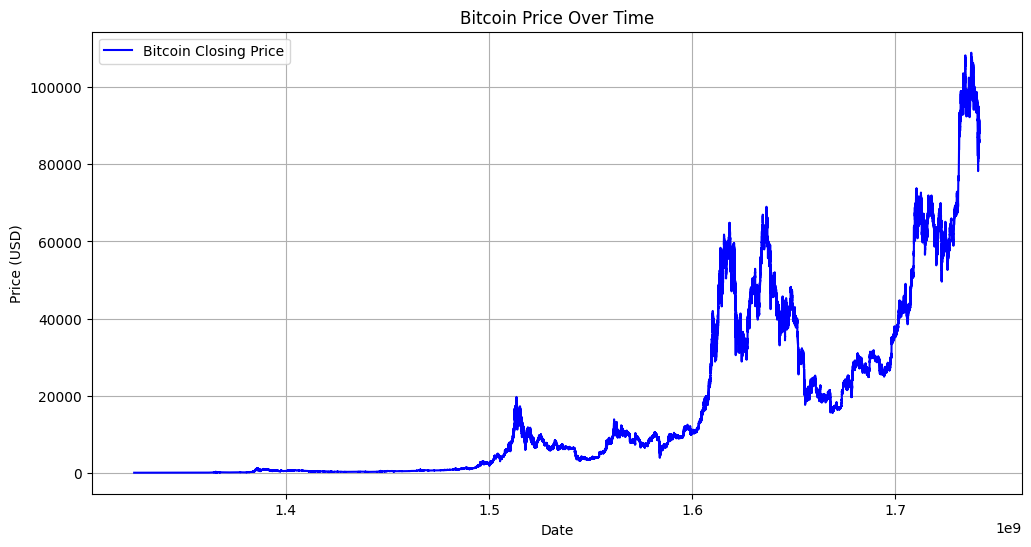

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Close'], color="blue", label="Bitcoin Closing Price")
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

### Calculate & Plot Moving Averages

Moving averages help us smooth price fluctuations.

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


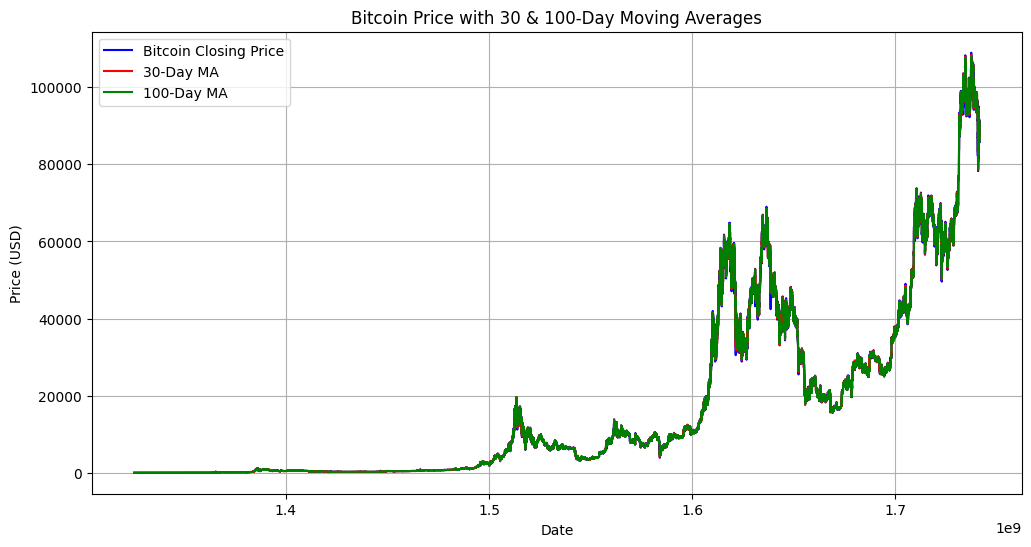

In [11]:
# Calculate 30-day & 100-day moving averages
df["MA_30"] = df["Close"].rolling(window=30).mean()
df["MA_100"] = df["Close"].rolling(window=100).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df["Close"], label="Bitcoin Closing Price", color="blue")
sns.lineplot(x=df.index, y=df["MA_30"], label="30-Day MA", color="red")
sns.lineplot(x=df.index, y=df["MA_100"], label="100-Day MA", color="green")

plt.title("Bitcoin Price with 30 & 100-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

### Analyze Bitcoin Price Volatility

Bitcoin is highly volatile, so let’s visualize daily percentage changes.

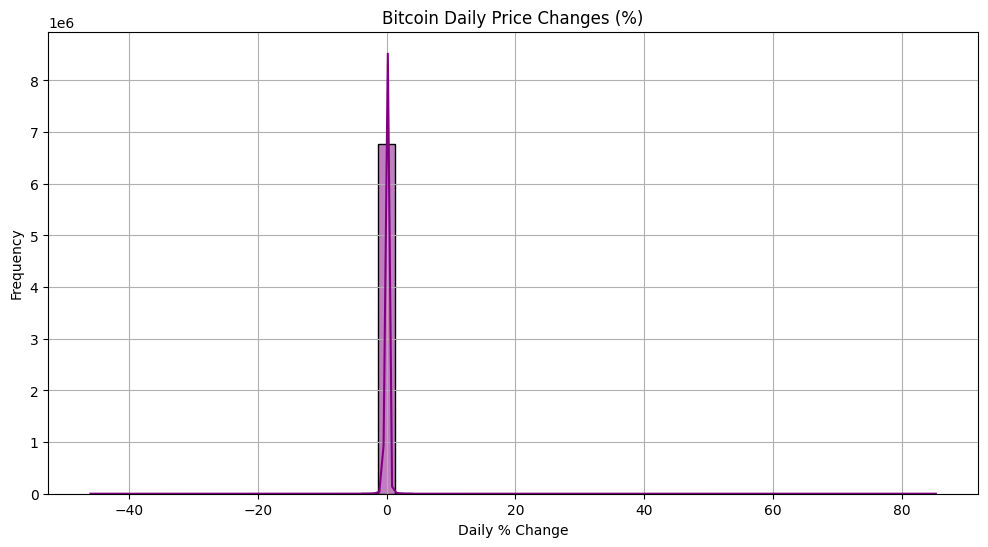

In [13]:
df["Daily_Change"] = df["Close"].pct_change() * 100  # Convert to percentage

plt.figure(figsize=(12, 6))
sns.histplot(df["Daily_Change"].dropna(), bins=50, kde=True, color="purple")
plt.title("Bitcoin Daily Price Changes (%)")
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Shift 'close' price to get the target (price 5 minutes ahead)
df["future_close"] = df["Close"].shift(-5)

# Drop NaN values caused by shifting
df.dropna(inplace=True)

# Select features for training
features = ["Open", "High", "Low", "Close", "Volume"]
X = df[features]
y = df["future_close"]  # Target is future closing price

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (5423340, 5)
Testing data shape: (1355836, 5)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Absolute Error (MAE): 20.24
Mean Squared Error (MSE): 3110.72


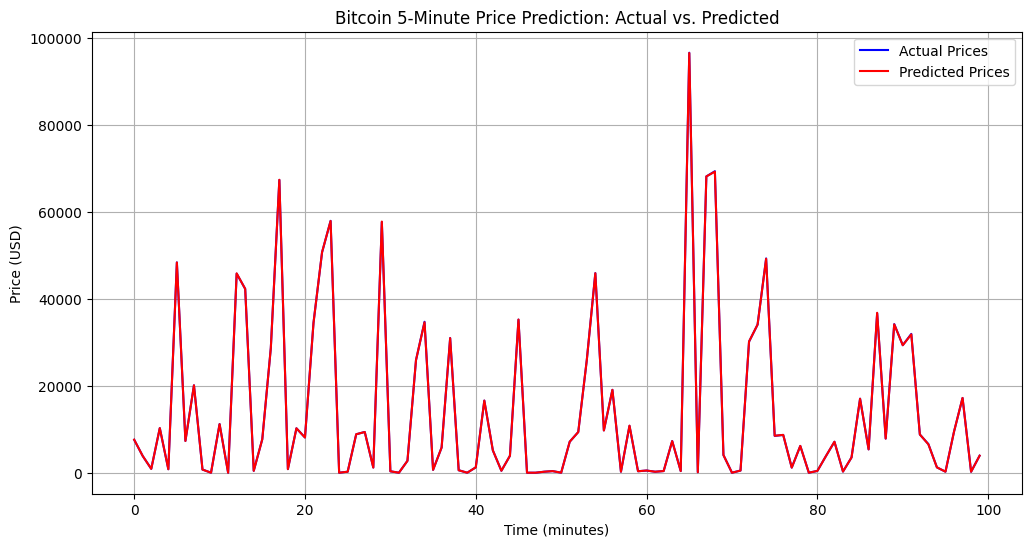

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label="Actual Prices", color="blue")
plt.plot(y_pred[:100], label="Predicted Prices", color="red")
plt.title("Bitcoin 5-Minute Price Prediction: Actual vs. Predicted")
plt.xlabel("Time (minutes)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()